In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [21]:
#import the data
train_Data = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\train_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 'Description'])
test_Data = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\test_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 'Description'])
test_Data_solution = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\train_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 'Description'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11336\1473837295.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_Data = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\train_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 'Description'])


C:\Users\hp\AppData\Local\Temp\ipykernel_11336\1473837295.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_Data = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\test_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 'Description'])
C:\Users\hp\AppData\Local\Temp\ipykernel_11336\1473837295.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_Data_solution = pd.read_csv('C:\\Users\\hp\\Desktop\\CODSOFT\\MOVIE GENRE CLASSIFICATION\\Genre Classification Dataset\\train_data.txt',sep=':::',names=['Movie_id', 'MV_Title', 'Gender', 

In [22]:
#Print the train data shape
print(train_Data.shape)

(54214, 4)


In [23]:
#Show the head of the train data
train_Data.head()

,Movie_id,MV_Title,Gender,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [24]:
#show if there are  missing values ,we don't have missing values   
train_Data.isnull().sum()

Movie_id       0
MV_Title       0
Gender         0
Description    0
dtype: int64

In [25]:
#print the test data shape
print(test_Data.shape)

(54200, 4)


In [26]:
#show if there are  missing values ,we don't have missing values   
test_Data.isnull().sum()

Movie_id           0
MV_Title           0
Gender             0
Description    54200
dtype: int64

In [27]:
#Show the head of the test data
test_Data.head()

,Movie_id,MV_Title,Gender,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [28]:
#print the test_data_solution  shape
test_Data_solution
print(test_Data_solution.shape)

(54214, 4)


In [29]:
test_Data_solution.head()

,Movie_id,MV_Title,Gender,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [30]:
test_Data_solution.isnull().sum()

Movie_id       0
MV_Title       0
Gender         0
Description    0
dtype: int64

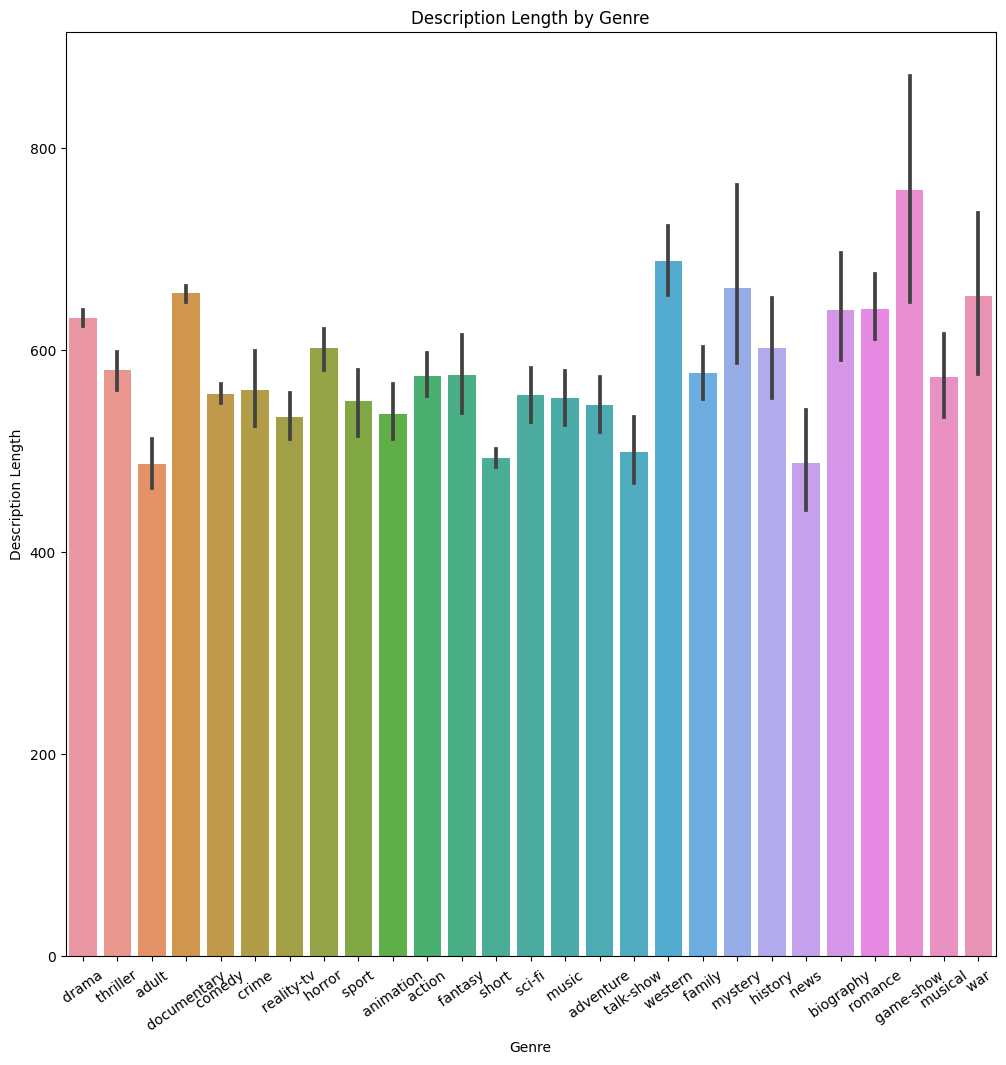

In [31]:
#Plotting the distribution of movie genres in the train dataset
train_Data['Description_Length'] = train_Data['Description'].apply(len)

plt.figure(figsize=(12, 12))
sns.barplot(x='Gender', y='Description_Length', data=train_Data)
plt.title('Description Length by Genre')
plt.xticks(rotation=35)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

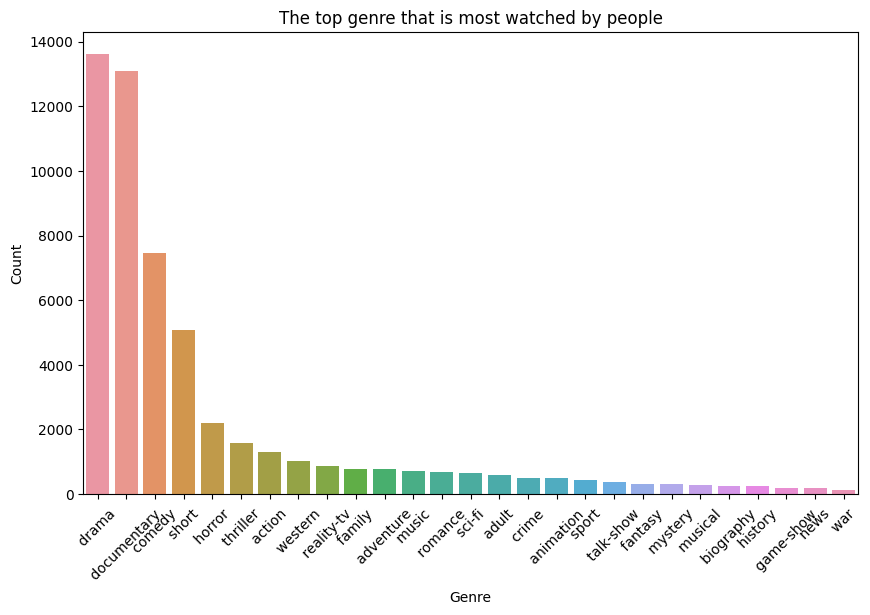

In [32]:
# Calculate the count of each genre
genre_counts = train_Data['Gender'].value_counts()

# Create a bar plot of the genre counts
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('The top genre that is most watched by people')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Handle any potential missing values in the 'Description' column of the train_Data and test_Data
train_Data['Description'].fillna("", inplace=True)
test_Data['Description'].fillna("", inplace=True)

#Initialize the TfidfVectorizer with specified parameters
t_v = TfidfVectorizer(stop_words='english', max_features=100000)

#Convert the 'Description' column of the train_Data into a matrix of TF-IDF features
X_train = t_v.fit_transform(train_Data['Description'])

#Convert the 'Description' column of the test_Data into a matrix of TF-IDF features
X_test = t_v.transform(test_Data['Description'])

#Initialize the LabelEncoder
label_encoder = LabelEncoder()

#Encode the 'Gender' column of the train_Data into numerical labels
y_train = label_encoder.fit_transform(train_Data['Gender'])

#Encode the 'Gender' column of the test_Data_solution into numerical labels
y_test = label_encoder.transform(test_Data_solution['Gender'])

In [34]:
#Split the training data into a smaller training subset and a validation subset
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Initialize and train the LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

#Predict the labels for the validation subset
y_val_pred = clf.predict(X_val)

#Calculate and print the validation accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

#Print the classification report for the validation subset
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [39]:
from sklearn.naive_bayes import MultinomialNB

#Initialize the MultinomialNB classifier
Mnb_classifier = MultinomialNB()

#Train the classifier using the training data
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [43]:
# Predict the labels for the validation subset using the trained MultinomialNB classifier
y_val_pred = Mnb_classifier.predict(X_val)

In [46]:
#Calculate the accuracy of the predicted labels on the validation subset
accuracy = accuracy_score(y_val, y_val_pred)

#Print the validation accuracy
print("Validation Accuracy:", accuracy)

#Print the classification report for the validation subset
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.47708198837959975
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.82      0.15      0.25      1443
           6       0.00      0.00      0.00       107
           7       0.55      0.93      0.69      2659
           8       0.41      0.91      0.56      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       1.00      0.00      0.01       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
     

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: Undefin

In [47]:
def predict_movie(description):
    #Transform the input description using the TF-IDF vectorizer
    t_v1 = t_v.transform([description])
    
    #Predict the label for the transformed description using the trained classifier
    pred_label = clf.predict(t_v1)
    
    #Convert the predicted label back to its original form using the label encoder
    predicted_movie = label_encoder.inverse_transform(pred_label)[0]
    
    #Return the predicted movie label
    return predicted_movie

#Example usage of the predict_movie function

#Example description for movie 1
descr_for_movie1 = "A movie where police chase down a notorious criminal"
print("Predicted genre for movie 1:", predict_movie(descr_for_movie1))

#Example description for movie 2
descr_for_movie2 = "An intense thriller with unexpected twists"
print("Predicted genre for movie 2:", predict_movie(descr_for_movie2))

#Example description for movie 3
descr_for_movie3 = "A heartwarming romantic comedy set in a small town"
print("Predicted genre for movie 3:", predict_movie(descr_for_movie3))

#Example description for movie 4
descr_for_movie4 = "A gripping drama based on true events"
print("Predicted genre for movie 4:", predict_movie(descr_for_movie4))

 crime 
 thriller 
 comedy 
 drama 
